In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
from importlib import reload
import PIVutils
import PODutils
import modred as mr

saveFolder = '/Users/Owen/Dropbox/Python Codes/ASIIT/Data/'
saveFile = 'RNV45-thumbs.hdf5'
imgFolder = saveFolder[:-5] + 'RNV45-PODthumbs'

import os
if not os.path.exists(imgFolder):
    os.makedirs(imgFolder)

In [2]:
import sys
sys.executable

'/Users/Owen/anaconda/bin/python'

In [3]:
#PIVutils = reload(PIVutils)
#X, Y, U, V, Swirl = PIVutils.loadDataset('/Users/Owen/Dropbox/Data/ABL/Heat Flux Data/Processed Results/N/Neutral45_2.mat',['X','Y','U','V','Swirl'],[])
#X, Y, U, V, Swirl, Cond, Prof = PIVutils.loadDataset('/Users/Owen/Dropbox/Data/ABL/Heat Flux Data/Processed Results/N/Neutral45.mat',['X','Y','U','V','Swirl'],['Cond','Prof'])
#X, Y, U, V, Swirl, Cond, Prof = PIVutils.loadDataset('/Users/Owen/Dropbox/Data/ABL/SBL PIV data/RNV45-RI2.mat',\
#                                                     ['X','Y','U','V','Swirl'],['Cond','Prof'])

In [57]:
X,Y,x,y,U,V,S,missVecs_Pro,Yind_Pro,Ypos_Pro,Ur,Vr,Sr,missVecs_Ret,Yind_Ret,Ypos_Ret,Yvec,Cond,Prof,ThumbParams = \
                        PIVutils.loadDataset(saveFolder + saveFile,
                         ['X','Y','x','y','U','V','S','missVecs','Yind_Pro','Ypos_Pro','Ur','Vr','Sr','missVecs_Ret','Yind_Ret','Ypos_Ret','Yvec'], 
                         ['Cond','Prof','ThumbParams'])
BoxSize = ThumbParams['BoxSize']
uSize = U.shape

['Cond', 'Prof', 'S', 'Sr', 'ThumbParams', 'U', 'Ur', 'V', 'Vr', 'X', 'Y', 'Yind_Pro', 'Yind_Ret', 'Ypos_Pro', 'Ypos_Ret', 'Yvec', 'missVecs', 'missVecs_Ret', 'x', 'y']


# Subtract mean profile

In [5]:
#Calculate mean velocity profiles
Umean = Prof['U']

#Now get the thumbnails
thumb = 0
for i in range(uSize[2]):
    ind = Yind_Pro[i]
    #U[:,:,thumb] = U[:,:,thumb]-np.transpose(np.tile(Umean[ind-BoxSize:ind+BoxSize+1],(1,uSize[0])),(1,0))
    U[:,:,thumb] = U[:,:,thumb]-np.tile(Umean[ind-BoxSize:ind+BoxSize+1],(1,uSize[0]))#Now get the thumbnails
    thumb+=1
#del Umean


/Users/Owen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Now do POD on the resulting thumbnails

In [6]:
#Set all NaNs to zero
U[np.isnan(U)] = 0
V[np.isnan(V)] = 0

uSize = U.shape

In [7]:
uAll = np.concatenate((U.reshape(uSize[0]*uSize[1],uSize[2]), V.reshape(uSize[0]*uSize[1],uSize[2])), axis = 0)
#uAll.shape      

In [8]:
num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(uAll, list(range(num_modes)))

In [9]:
menergy = eig_vals/np.sum(eig_vals)
menergy_sum = np.zeros(len(menergy))
for i in range(len(menergy)):
    menergy_sum[i] = np.sum(menergy[:i]);

In [10]:
reload(PODutils)
Umodes, Vmodes= PODutils.reconstructPODmodes(modes,uSize,num_modes,2)

In [11]:
#Calculate the mode coefficients
C = modes.transpose()*uAll
C = np.asarray(C)

### Plot modal energy and contribution total

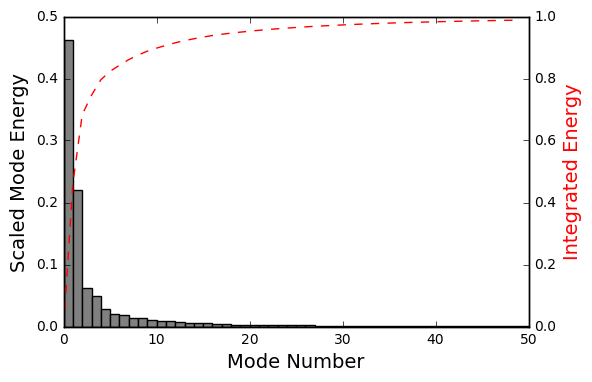

In [12]:
ind = np.arange(num_modes)  # the x locations for the groups
width = 1       # the width of the bars

f = plt.figure()
ax = plt.gca()
ax2 = plt.twinx()
rect = ax.bar(ind,menergy[:num_modes], width, color='gray')
line = ax2.plot(ind,menergy_sum[:num_modes],'--r')

ax.set_xlabel("Mode Number",fontsize=14)
ax.set_ylabel("Scaled Mode Energy",fontsize=14)
ax2.set_ylabel("Integrated Energy",fontsize=14,color='red')

f.savefig(saveFolder + '/ModeEnergy-Pro-10.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

### Plot some modes

/Users/Owen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app
/Users/Owen/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


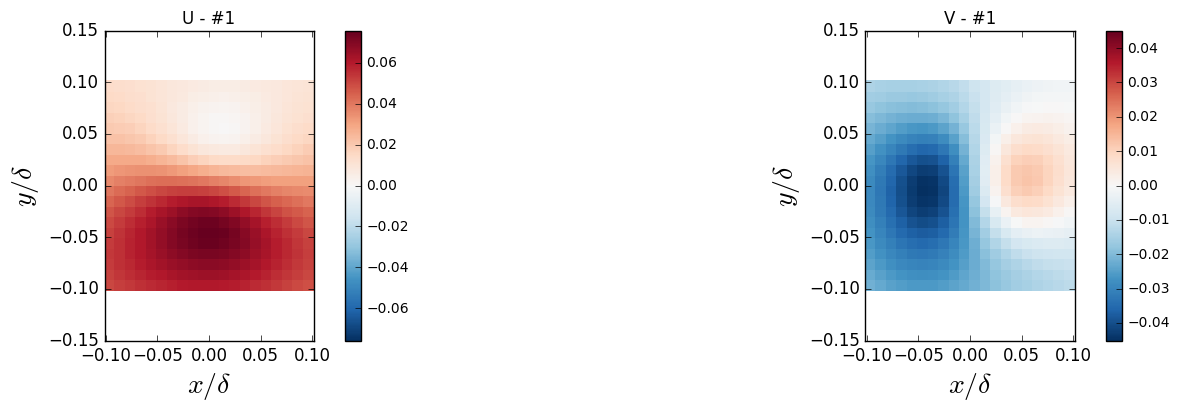

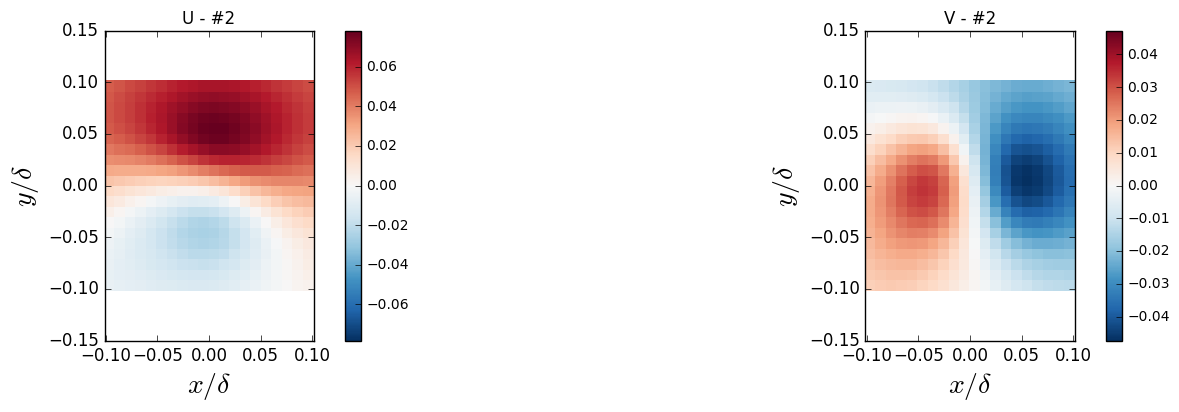

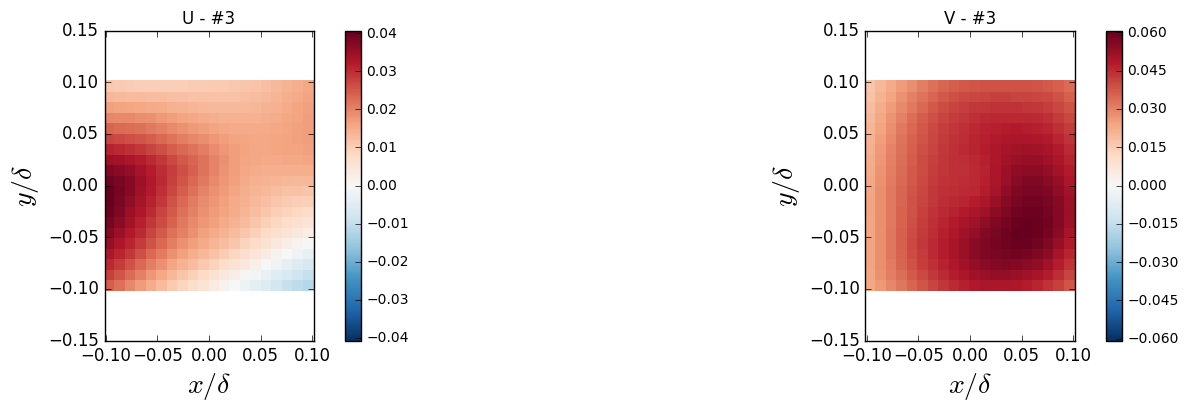

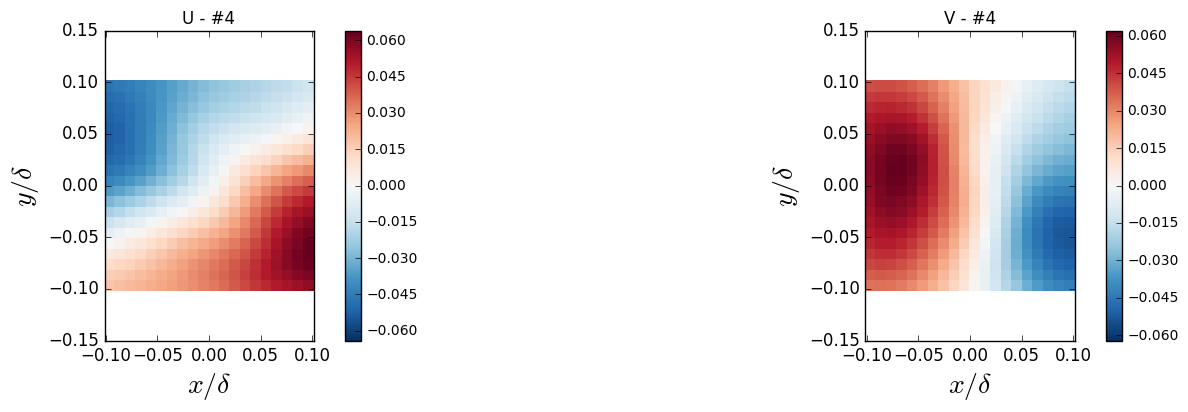

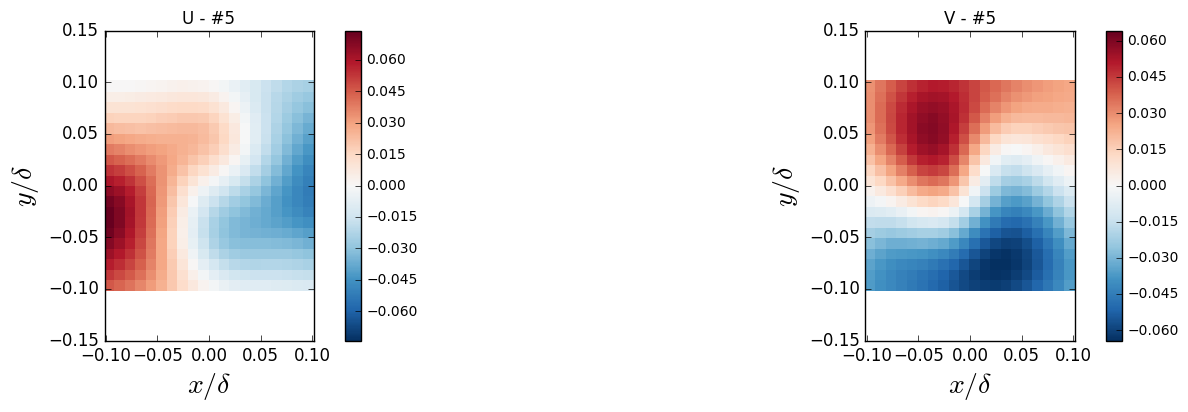

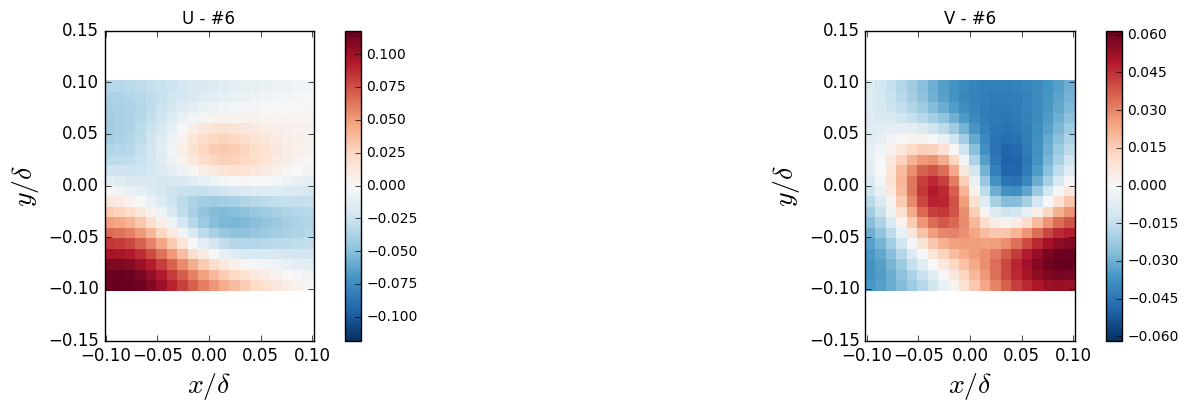

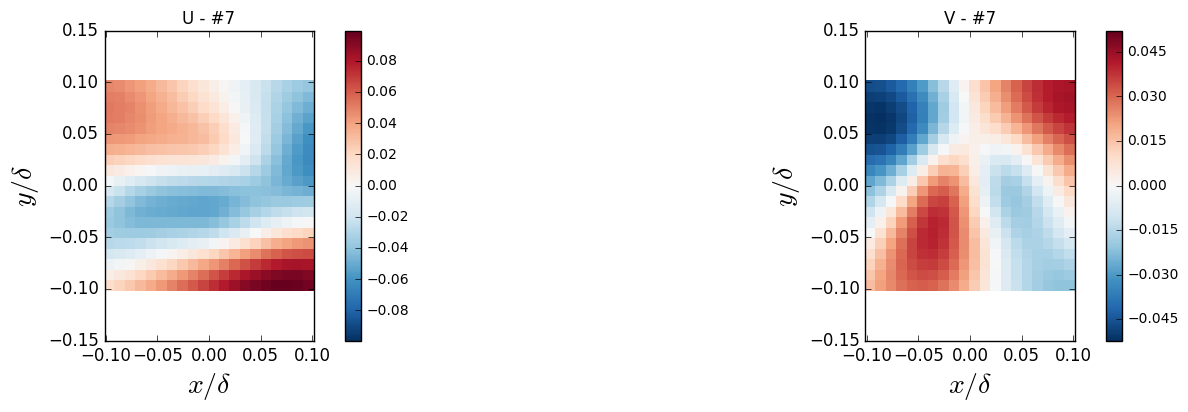

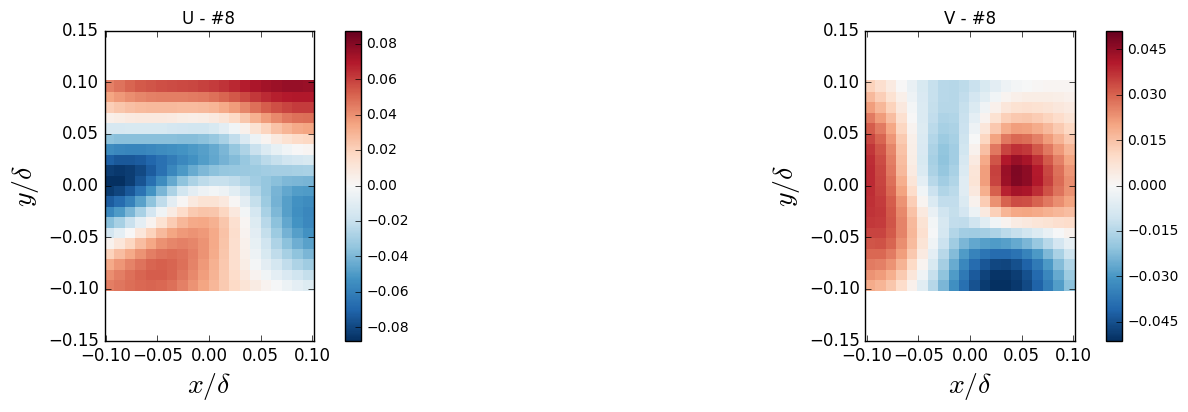

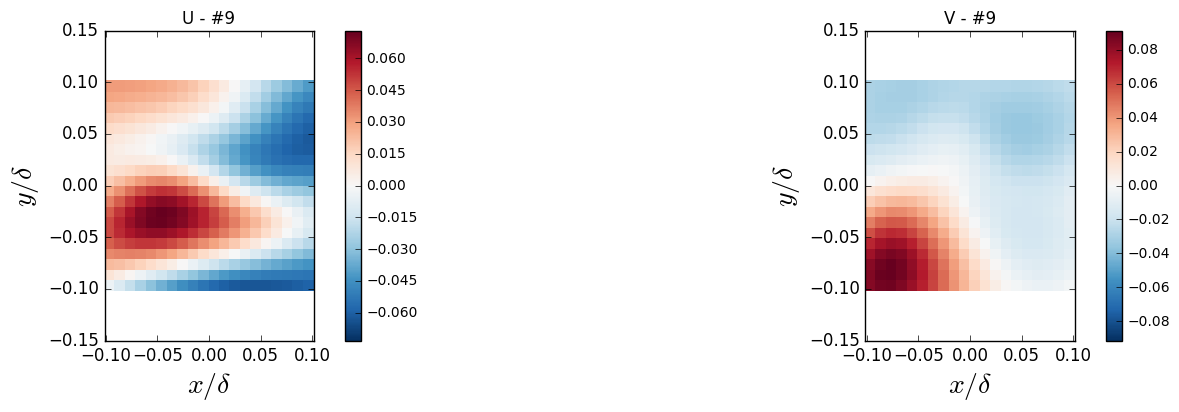

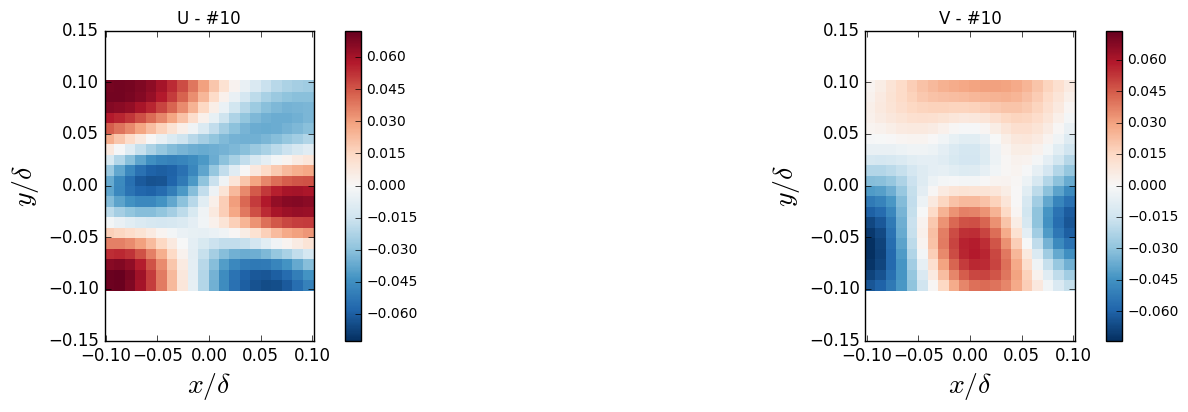

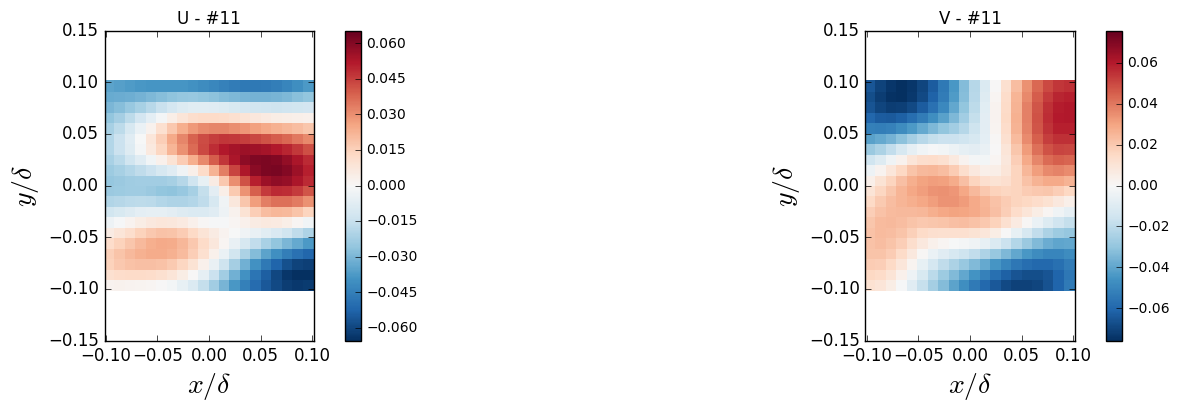

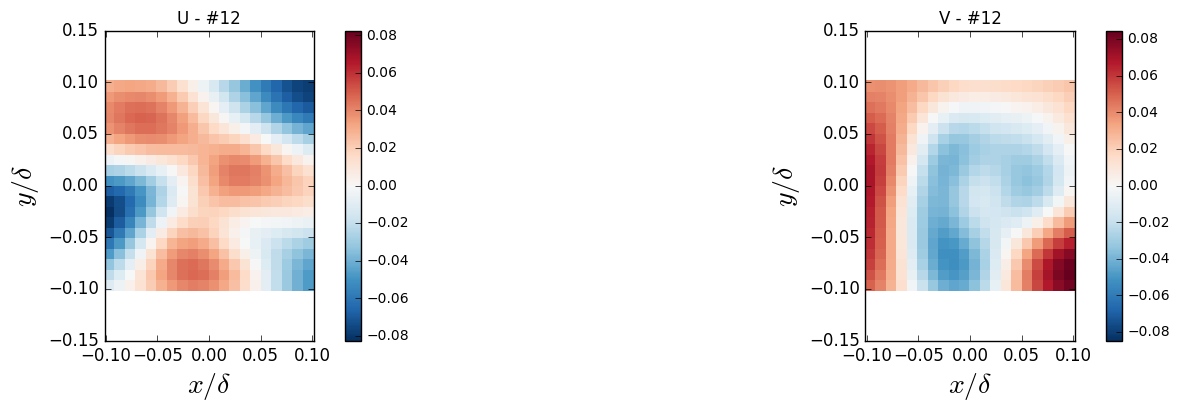

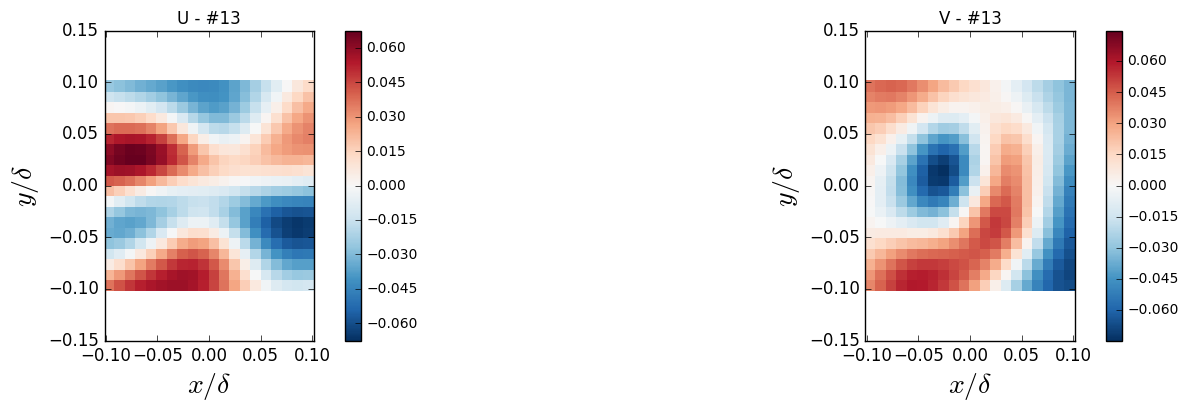

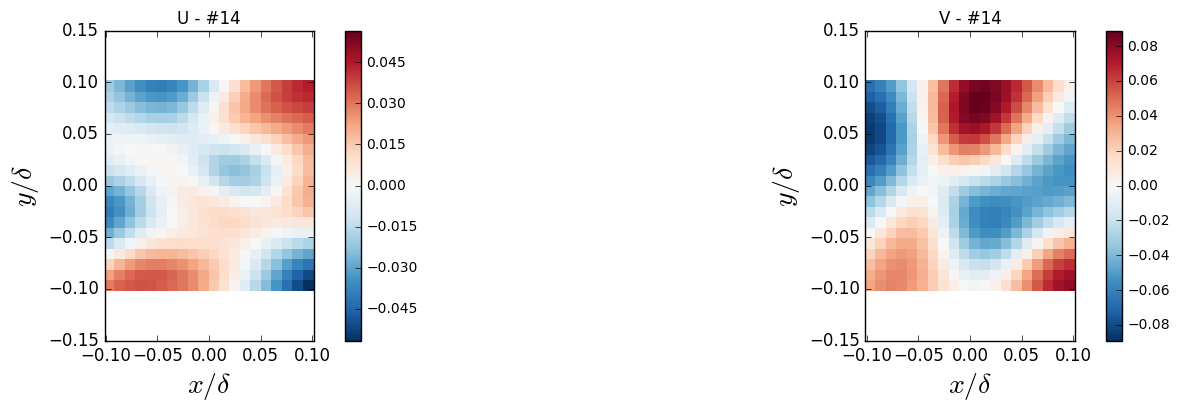

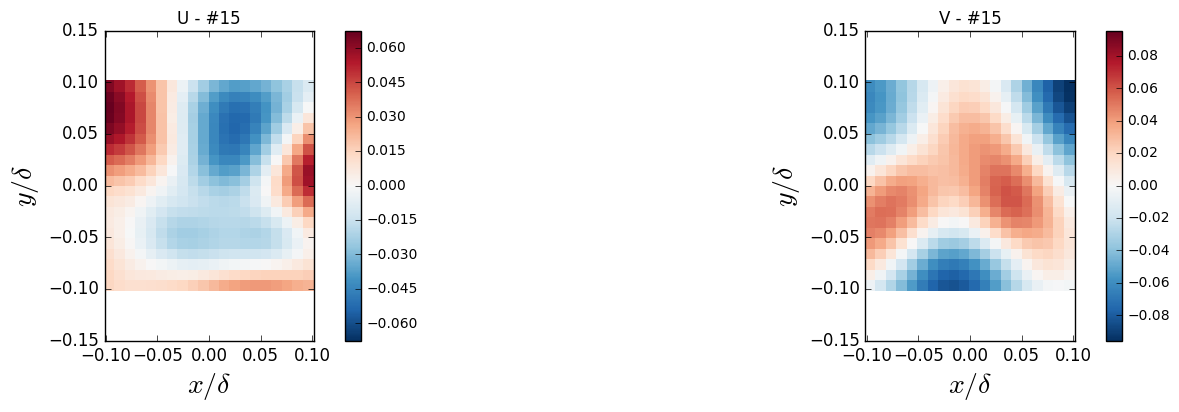

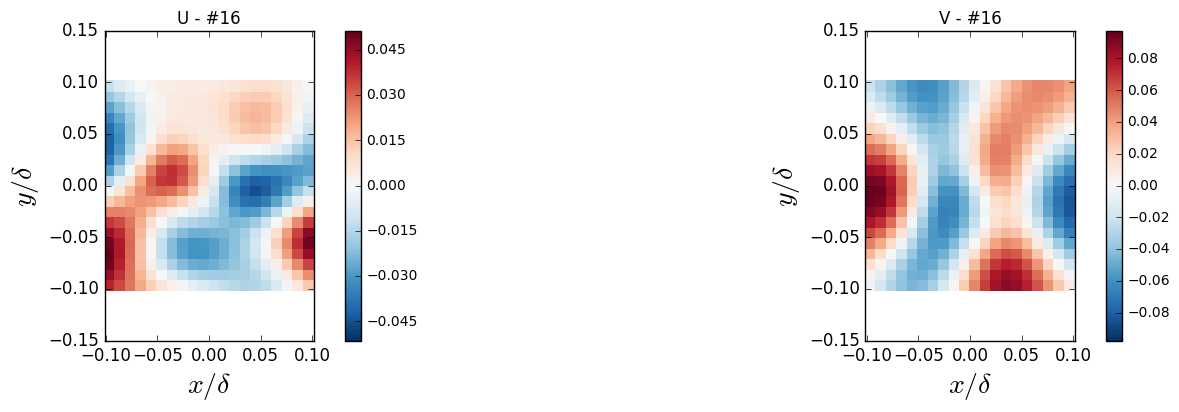

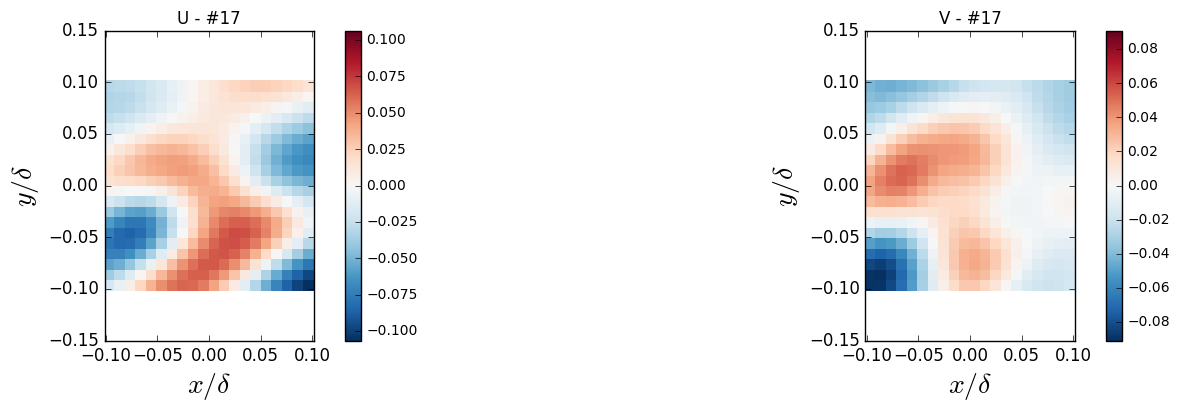

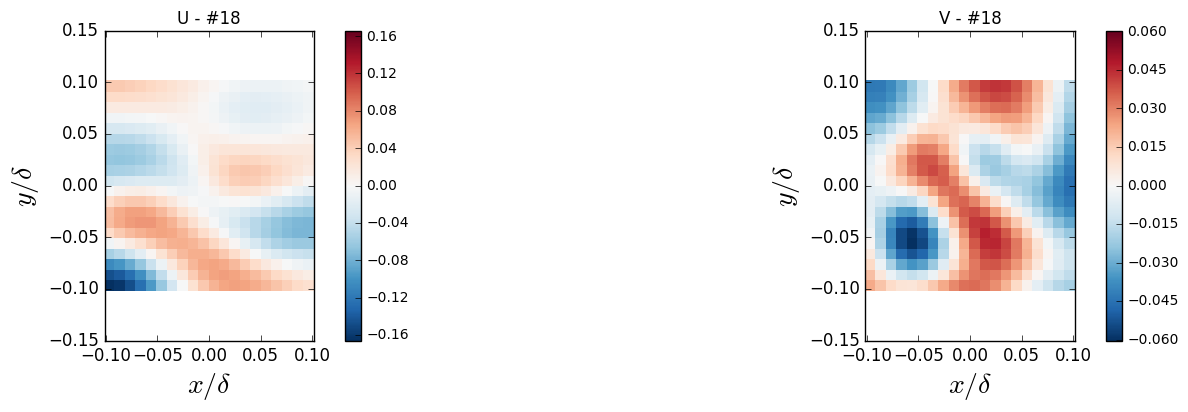

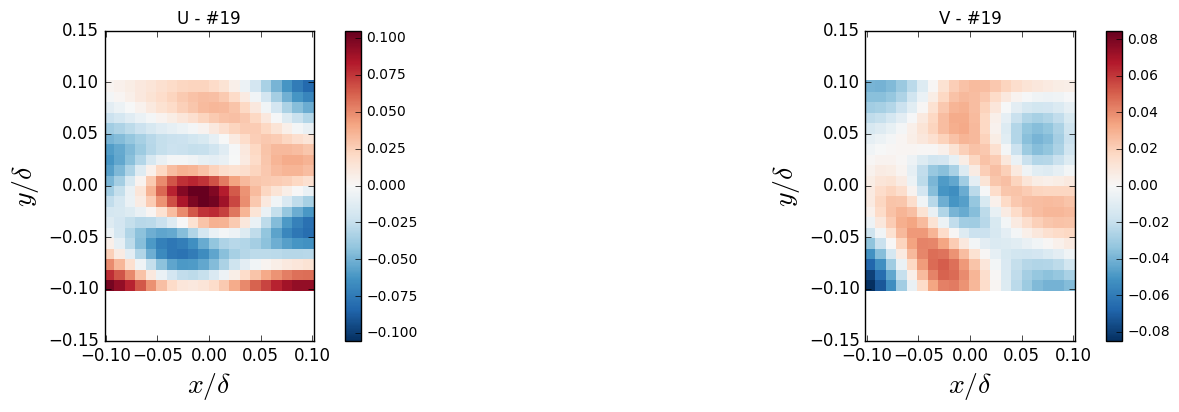

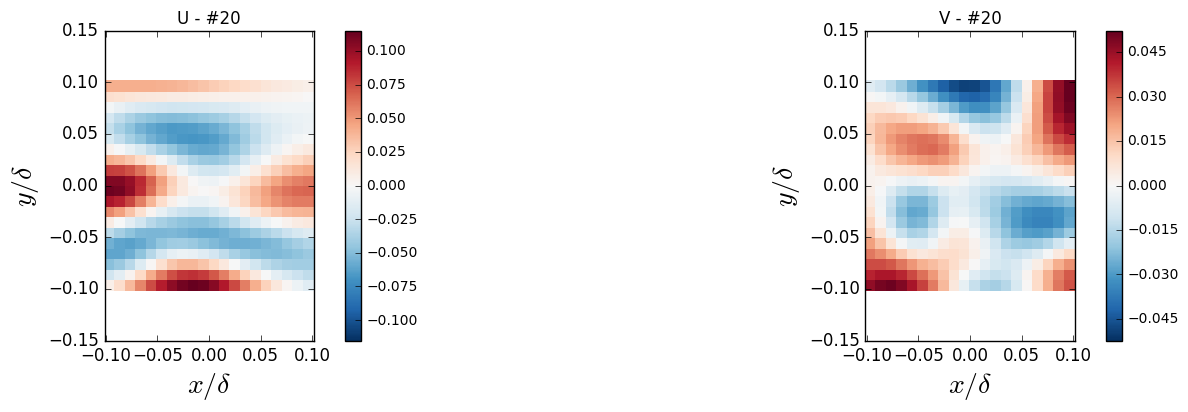

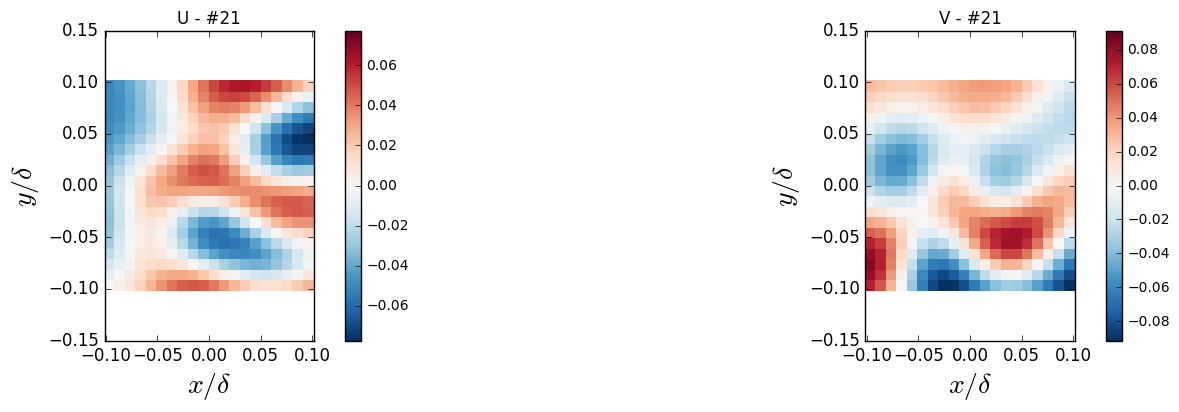

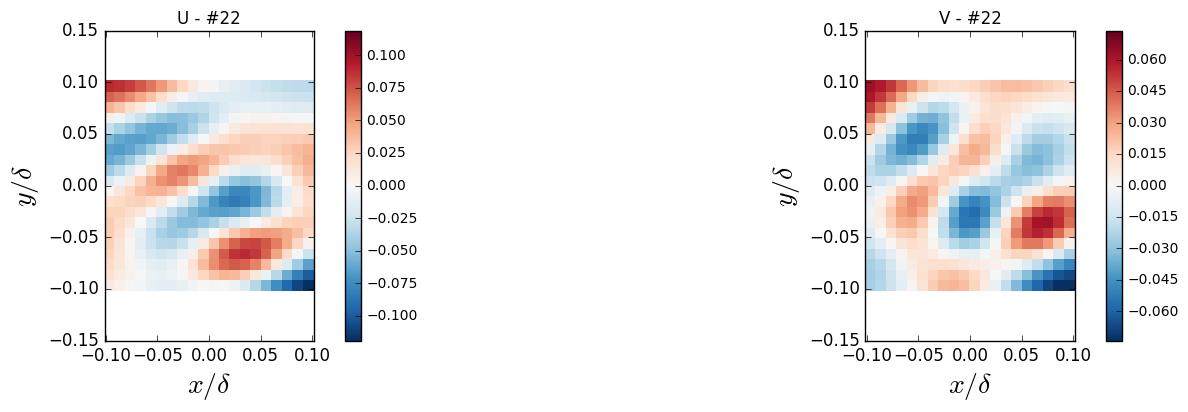

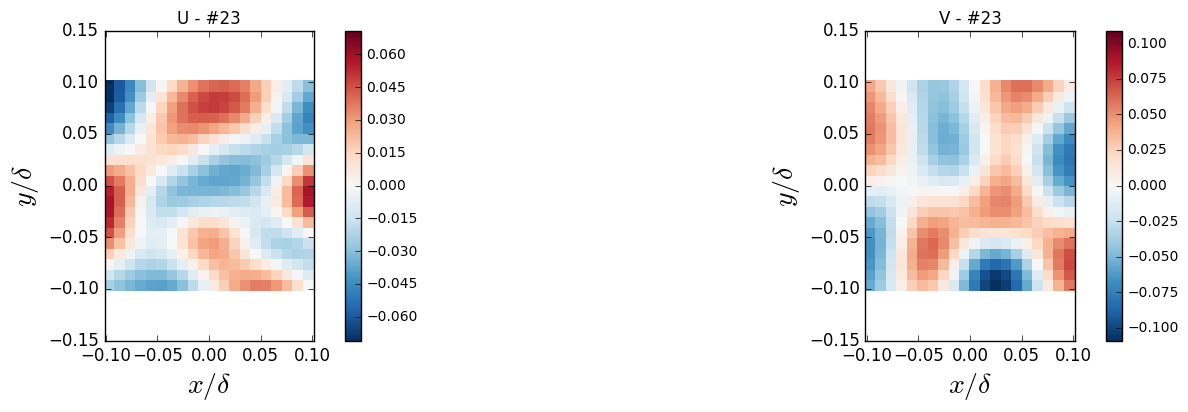

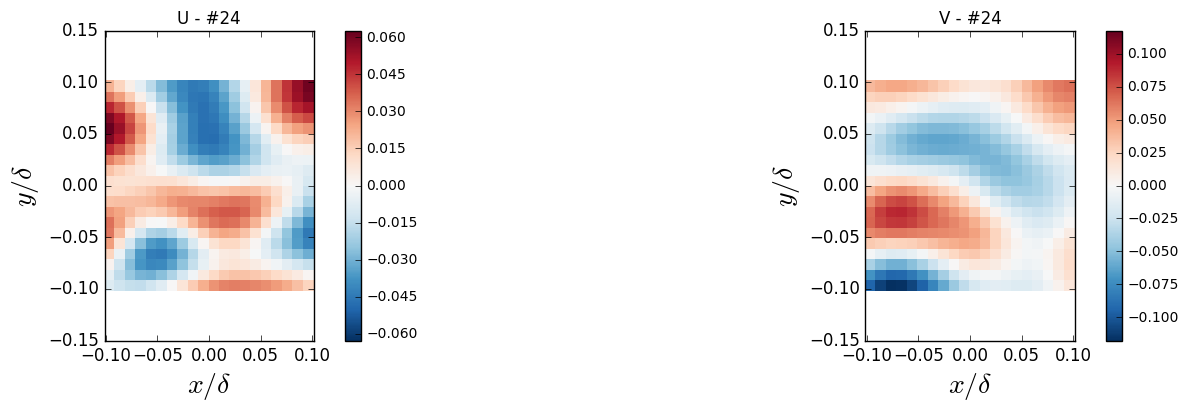

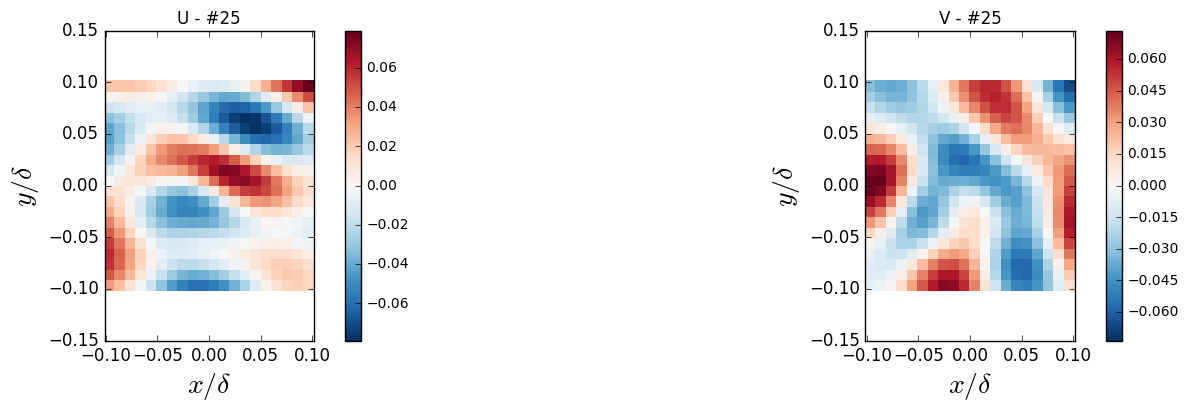

In [13]:
import PODutils
PODutils.plotPODmodes2D(X[:2*BoxSize+1,:2*BoxSize+1],Y[:2*BoxSize+1,:2*BoxSize+1],Umodes,Vmodes,list(range(25)),saveFolder)

### Plot the variation of the coefficients

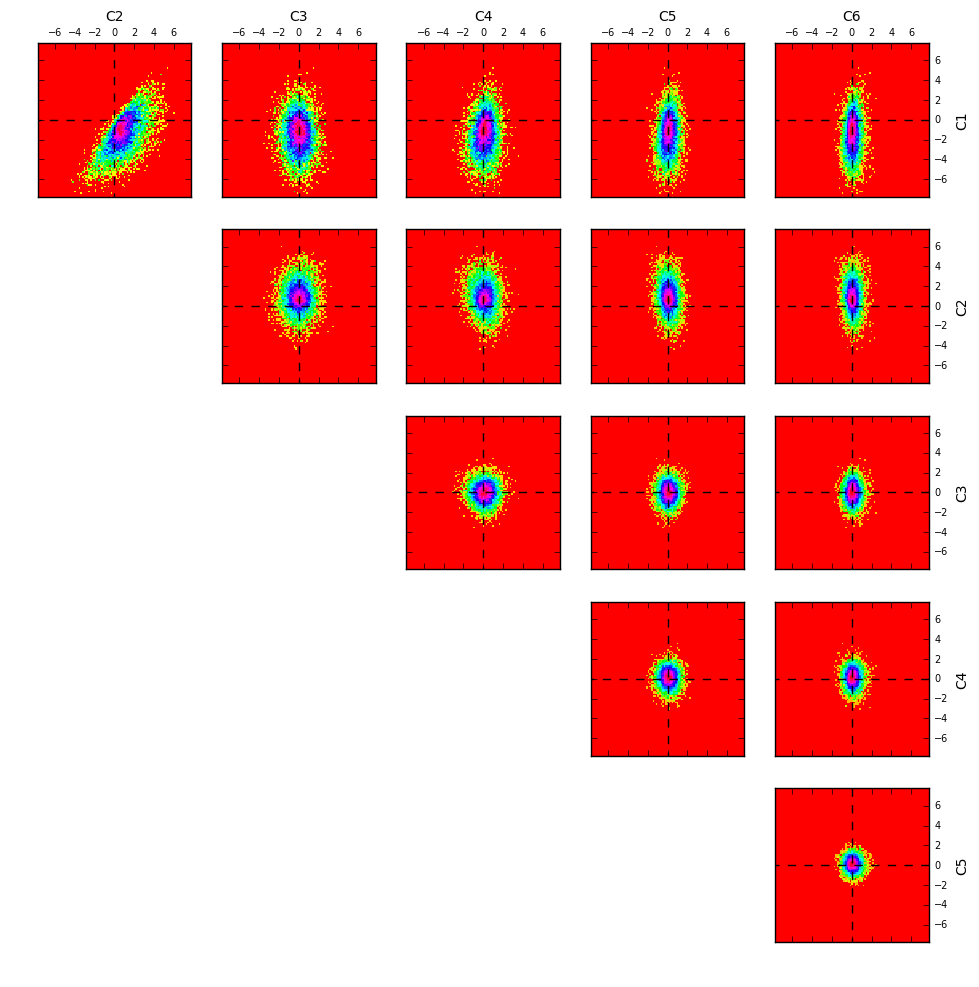

In [14]:
reload(PODutils)
PODutils.plotPODcoeff(C,list(range(6)),100,8,1,saveFolder)

In [15]:
#ind = 0
#ypos =[]
#for i in range(len(cent_Pro)):
#    for j in range(len(cent_Pro[i])):
#        ypos = np.concatenate([ypos, [Y[cent_Pro[i][j][0],1]]])
        
        #[ind] = cent_Pro[i][j][0]*scale+Y[1,1]
        #ind+=1


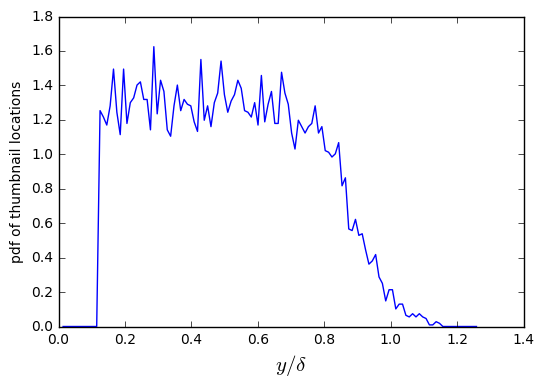

In [16]:
# Calcualte pdf of wall-normal locations
xedges = Yvec
xedges = np.concatenate([[xedges[0]-(xedges[1]-xedges[0])],xedges, [xedges[-1]+xedges[-1]-xedges[-2]]])
p, x = np.histogram(Ypos_Pro, xedges,normed=True)
x = x[:-1] + (x[1] - x[0])/2 
plt.plot(x, p)
plt.xlabel('$y/\delta$', fontsize=15)
plt.ylabel('pdf of thumbnail locations')

plt.savefig(saveFolder + '/PDFswirl-Pro-10.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

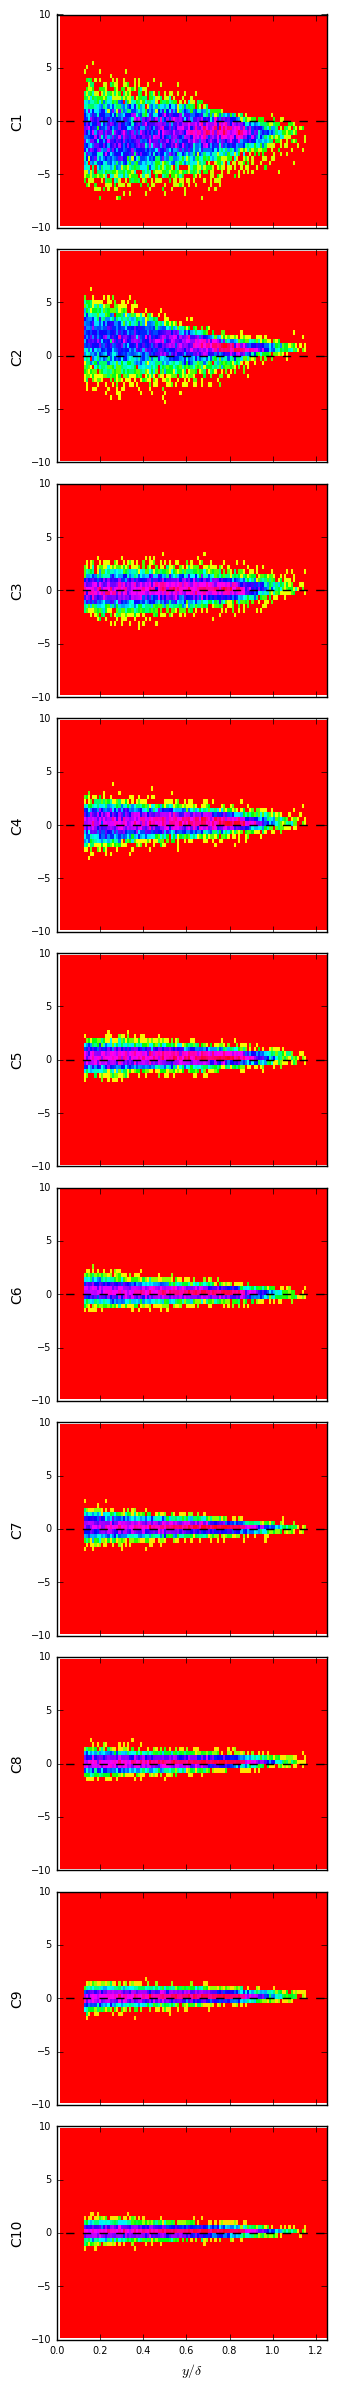

In [22]:
reload(PODutils)
C2 = C.copy()
C2 = np.concatenate([Ypos_Pro.reshape((-1, 1)).T, C2], axis=0)
PODutils.plotYposPODcoeff(Yvec,C2,list(range(10)),50,10,1,saveFolder)

In [23]:
del C,C2,modes,Umodes,Vmodes

# Do POD on retrograde swirl blobs (Box = 21x21)

In [58]:
#Set all NaNs to zero
Ur[np.isnan(Ur)] = 0
Vr[np.isnan(Vr)] = 0

uSize = Ur.shape
print(uSize)

(21, 21, 3489)


In [59]:
thumb = 0

for i in range(uSize[2]):
    ind = Yind_Ret[i]
    #U[:,:,thumb] = U[:,:,thumb]-np.transpose(np.tile(Umean[ind-BoxSize:ind+BoxSize+1],(1,uSize[0])),(1,0))
    Ur[:,:,thumb] = Ur[:,:,thumb]-np.tile(Umean[ind-BoxSize:ind+BoxSize+1],(1,uSize[0]))
    thumb+=1
#del Umean

/Users/Owen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [60]:
uAll = np.concatenate((Ur.reshape(uSize[0]*uSize[1],uSize[2]), Vr.reshape(uSize[0]*uSize[1],uSize[2])), axis = 0)
#uAll.shape      

In [61]:
import modred as mr

num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(uAll, list(range(num_modes)))

In [62]:
menergy = eig_vals/np.sum(eig_vals)
menergy_sum = np.zeros(len(menergy))
for i in range(len(menergy)):
    menergy_sum[i] = np.sum(menergy[:i]);

In [63]:
reload(PODutils)
Umodes, Vmodes= PODutils.reconstructPODmodes(modes,uSize,num_modes,2)

In [64]:
#Calculate the mode coefficients
C = modes.transpose()*uAll
C = np.asarray(C)

### Plot modal energy and contribution total

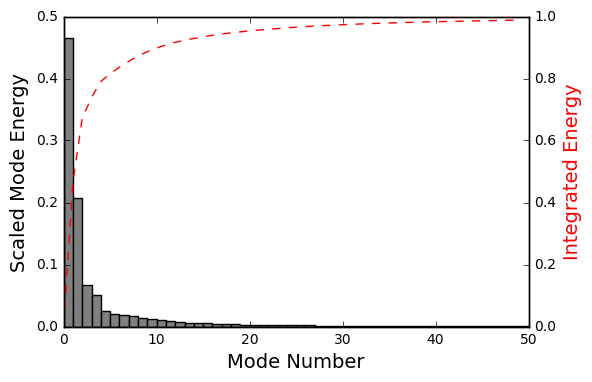

In [65]:
ind = np.arange(num_modes)  # the x locations for the groups
width = 1       # the width of the bars

f = plt.figure()
ax = plt.gca()
ax2 = plt.twinx()
rect = ax.bar(ind,menergy[:num_modes], width, color='gray')
line = ax2.plot(ind,menergy_sum[:num_modes],'--r')

ax.set_xlabel("Mode Number",fontsize=14)
ax.set_ylabel("Scaled Mode Energy",fontsize=14)
ax2.set_ylabel("Integrated Energy",fontsize=14,color='red')

f.savefig(saveFolder + '/ModeEnergy-Ret-10.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

### Plot some modes

/Users/Owen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app
/Users/Owen/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


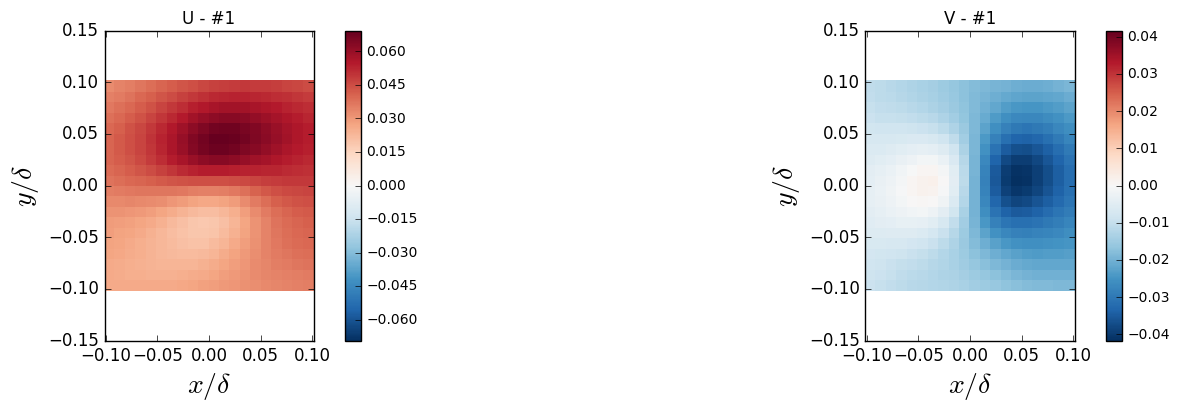

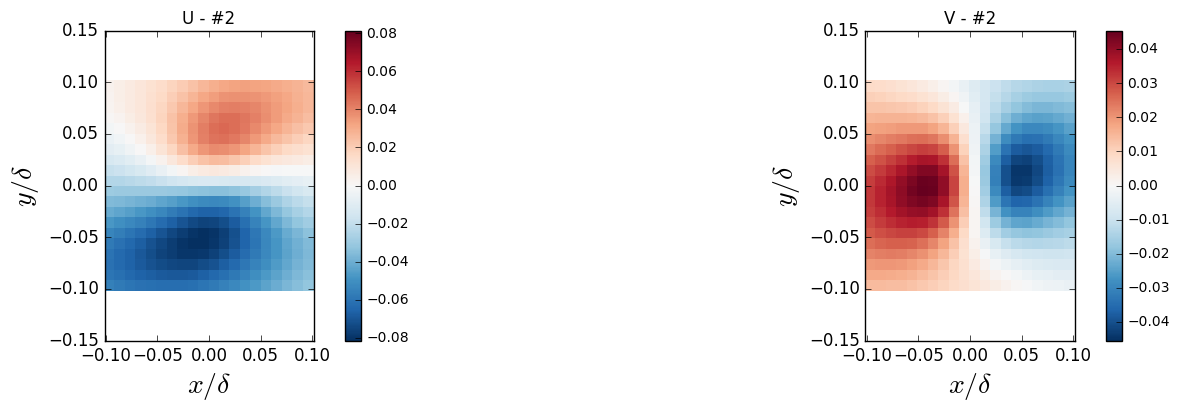

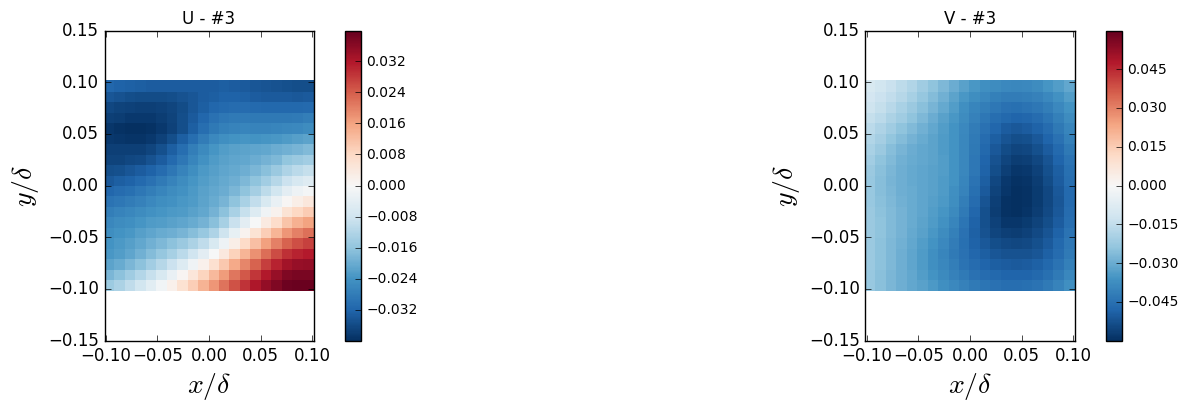

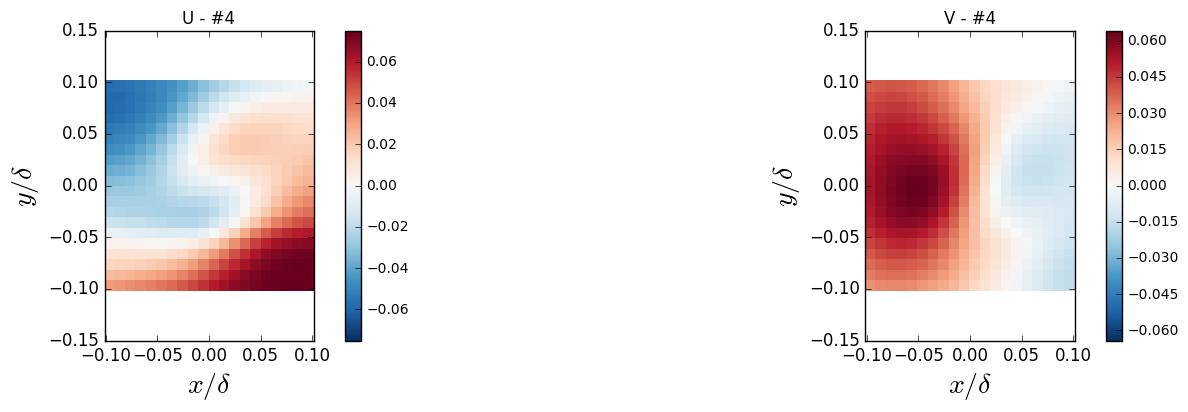

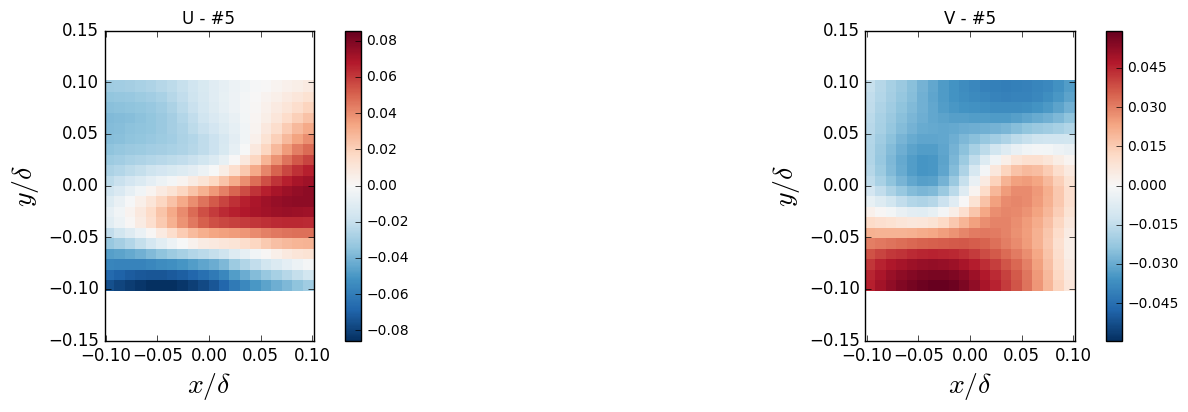

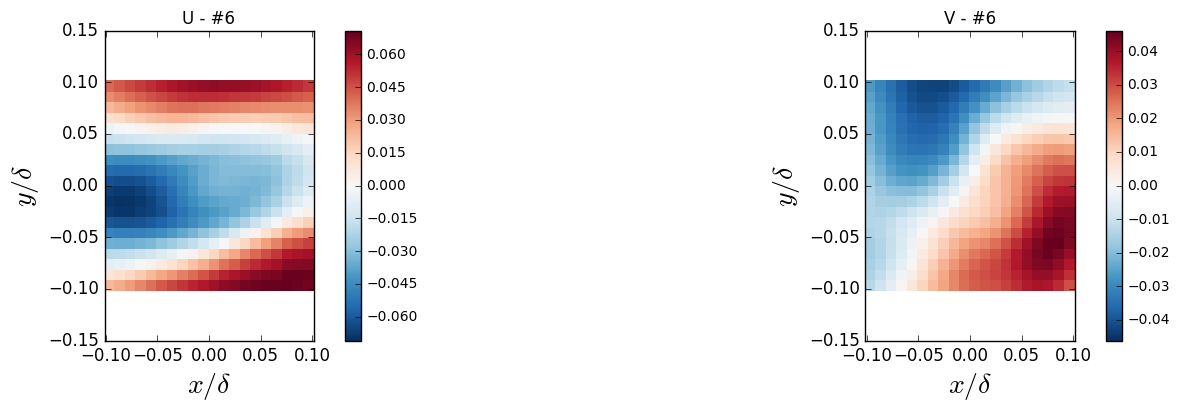

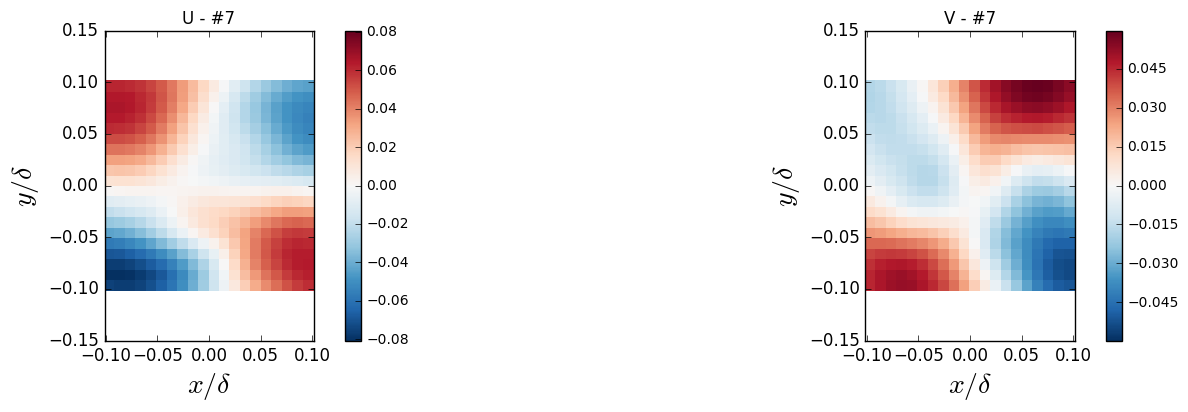

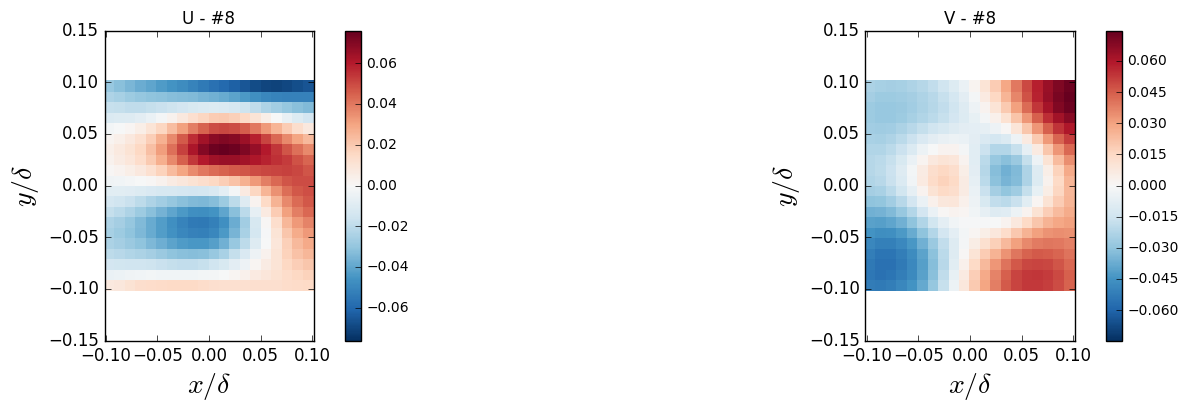

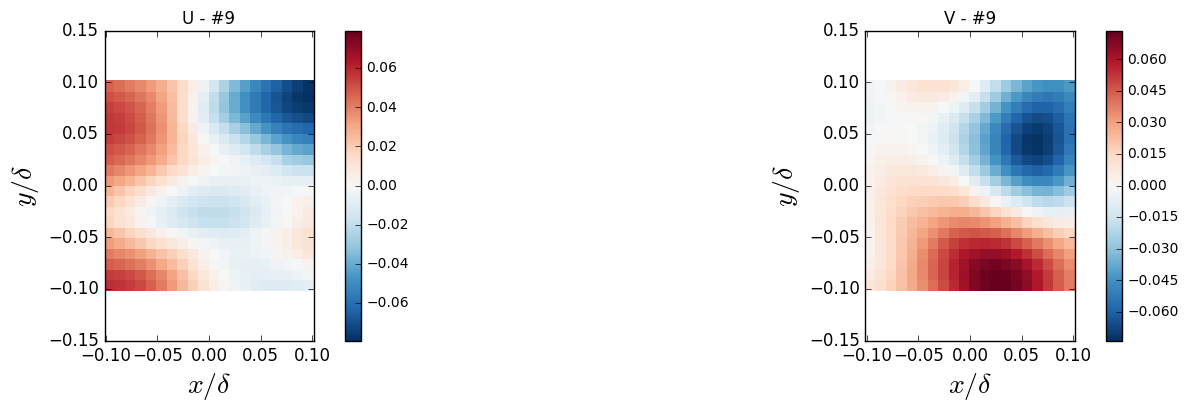

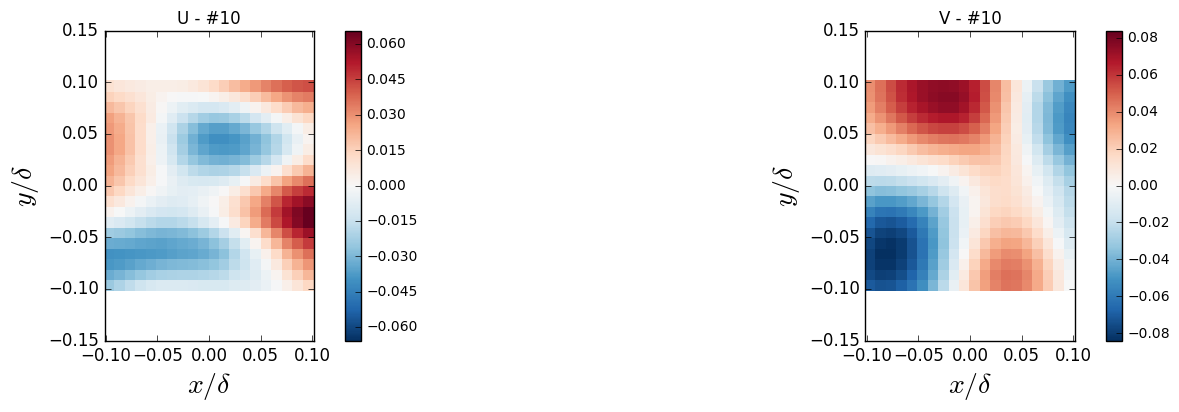

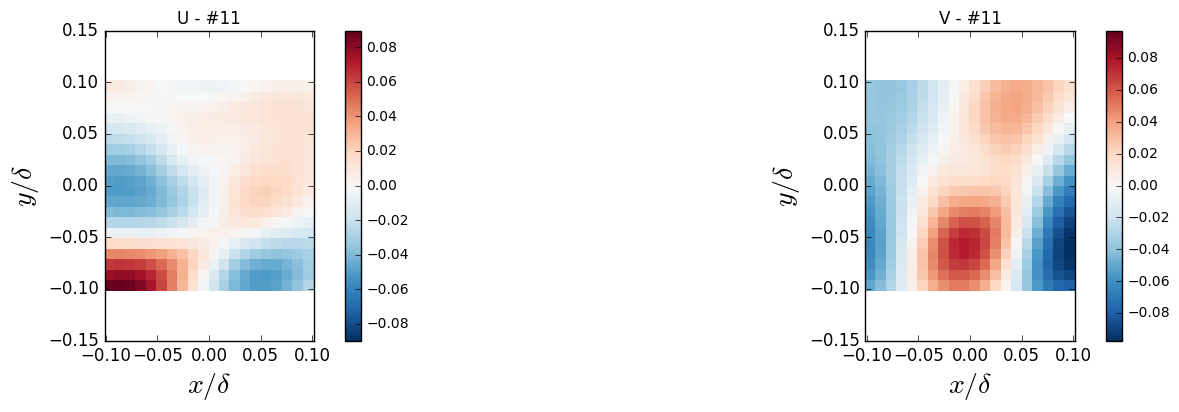

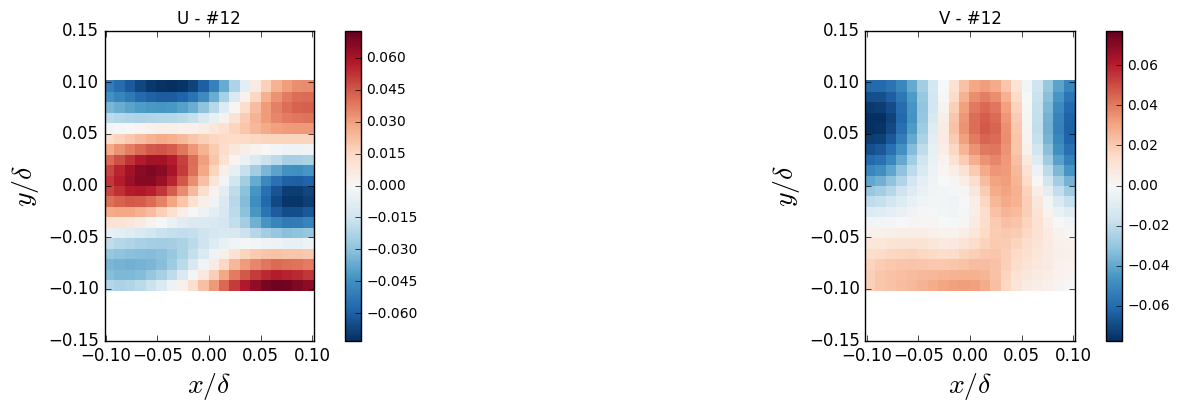

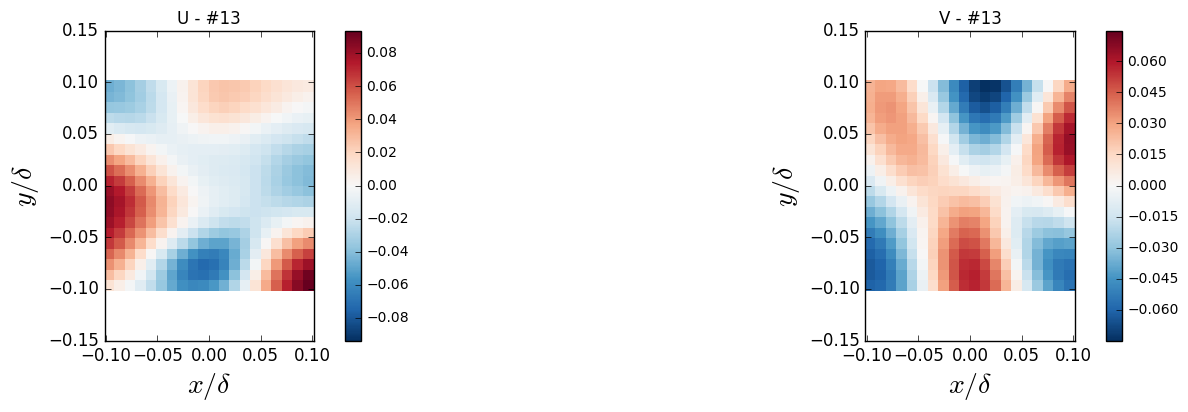

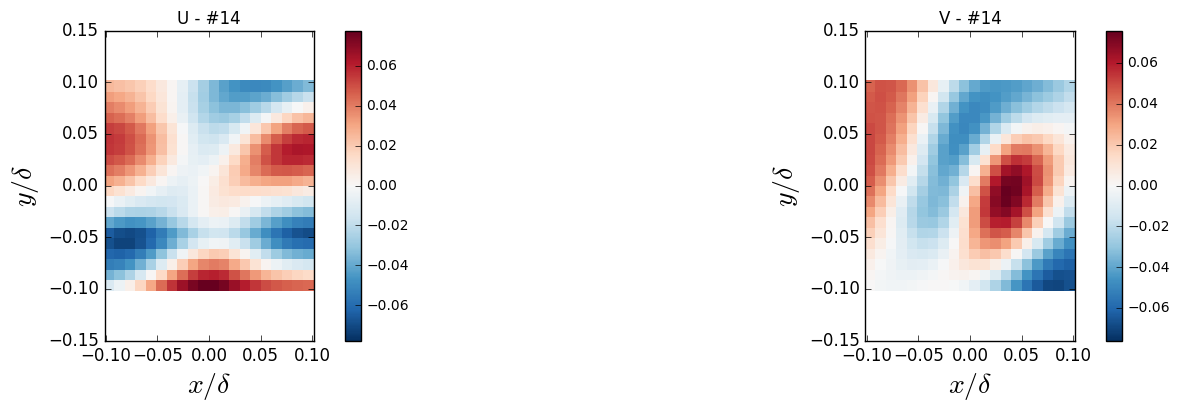

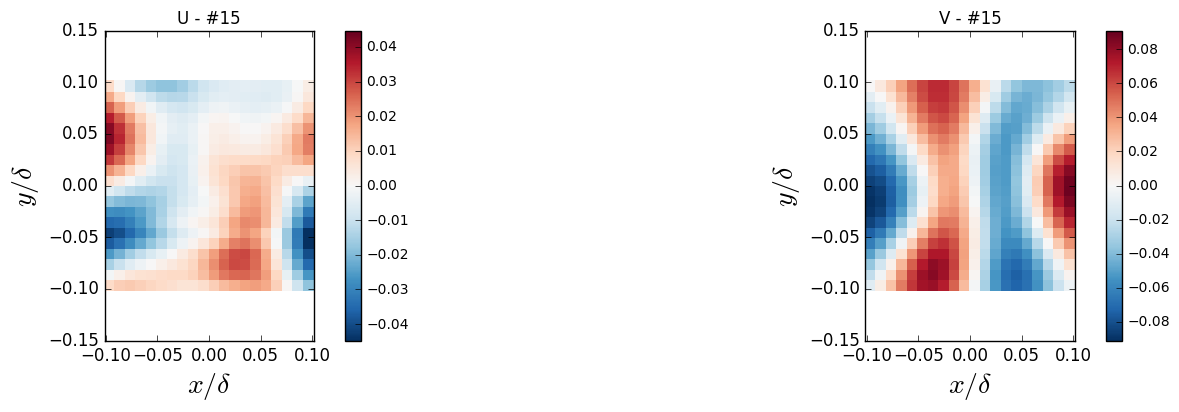

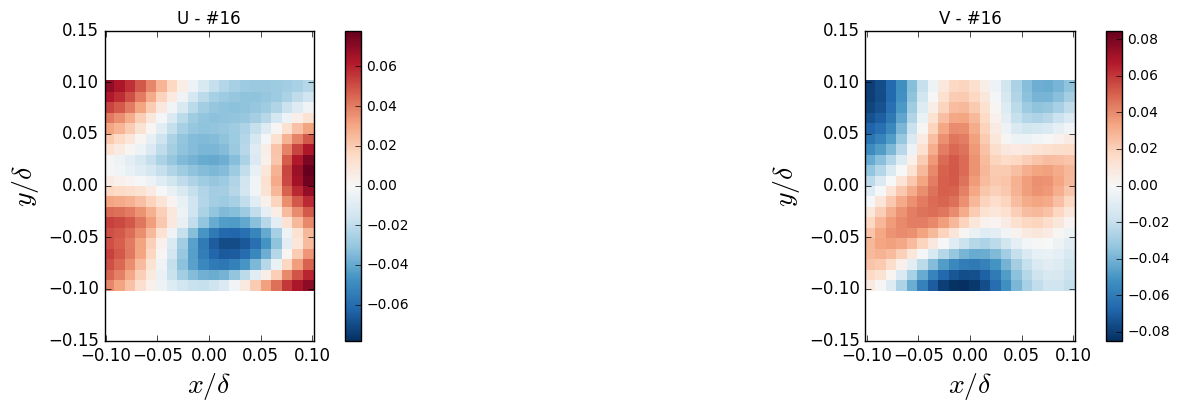

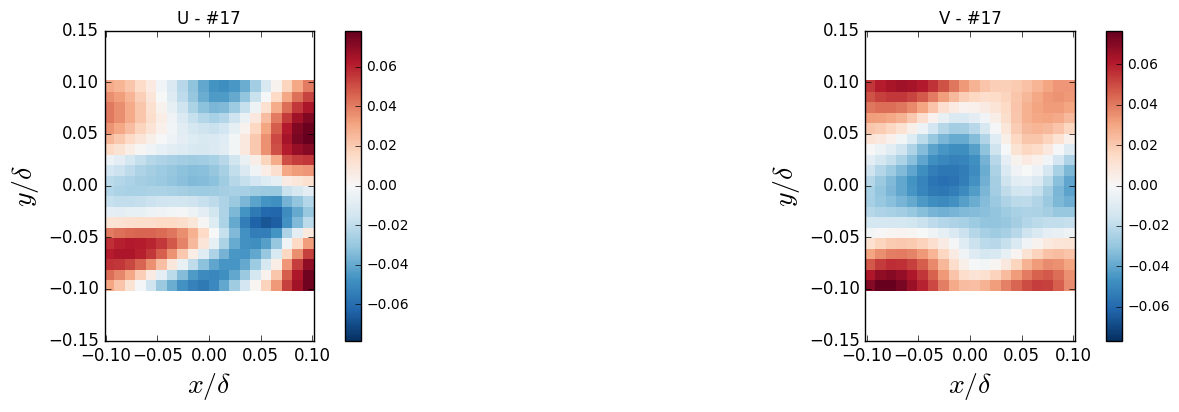

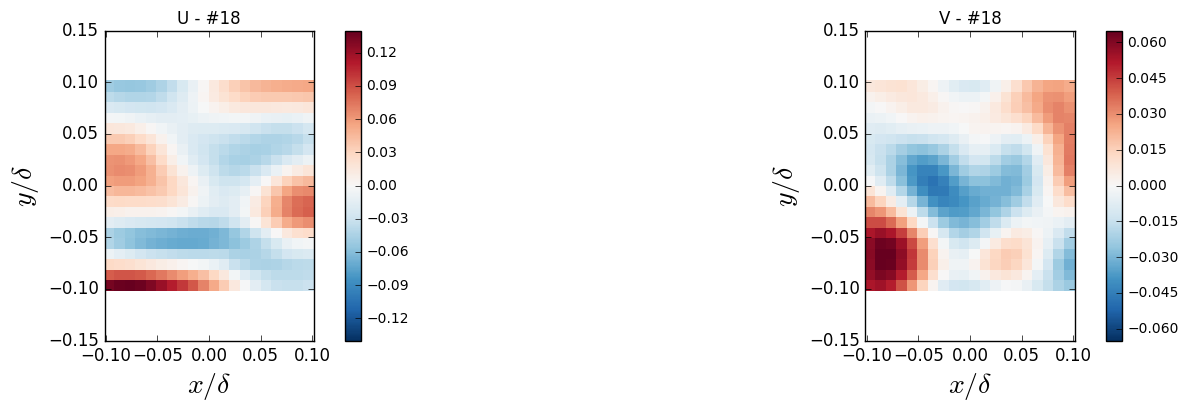

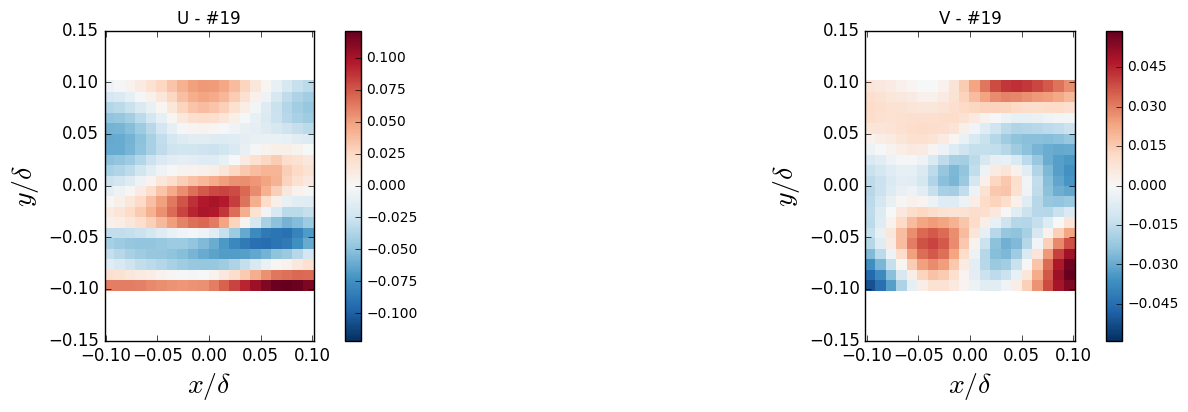

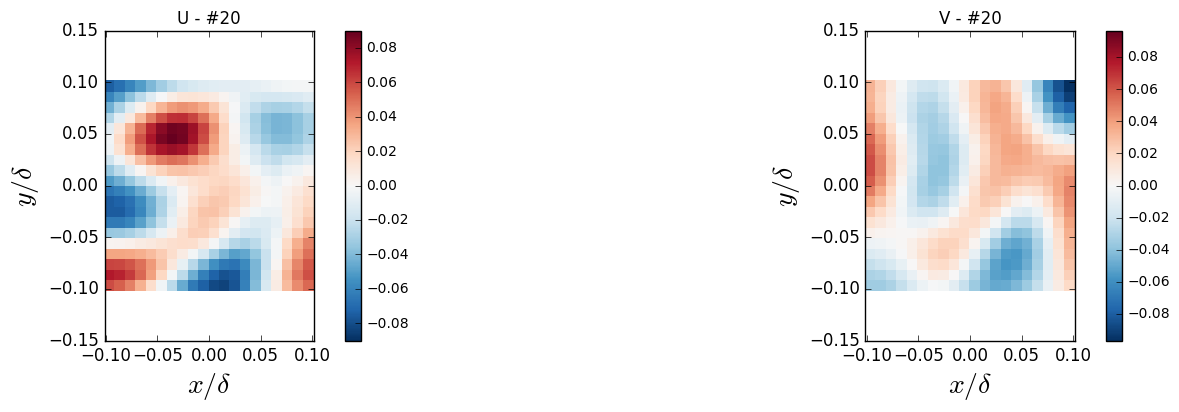

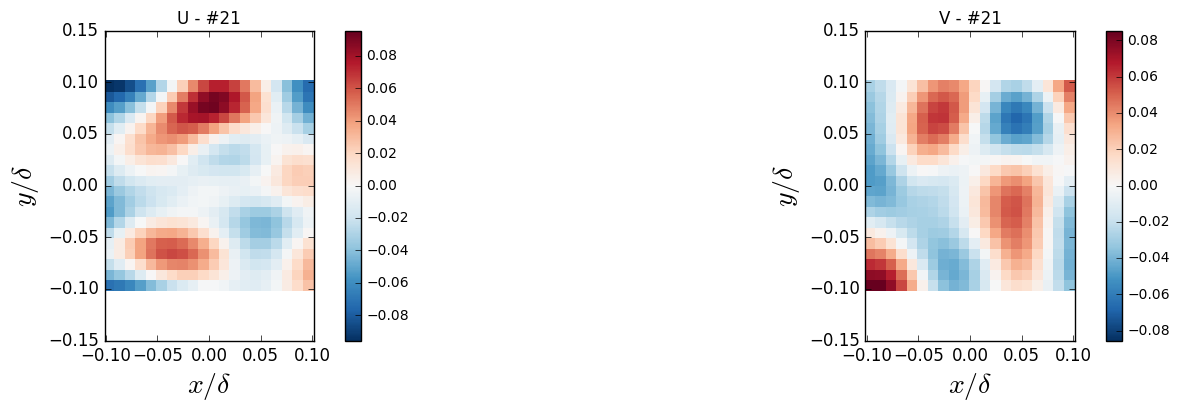

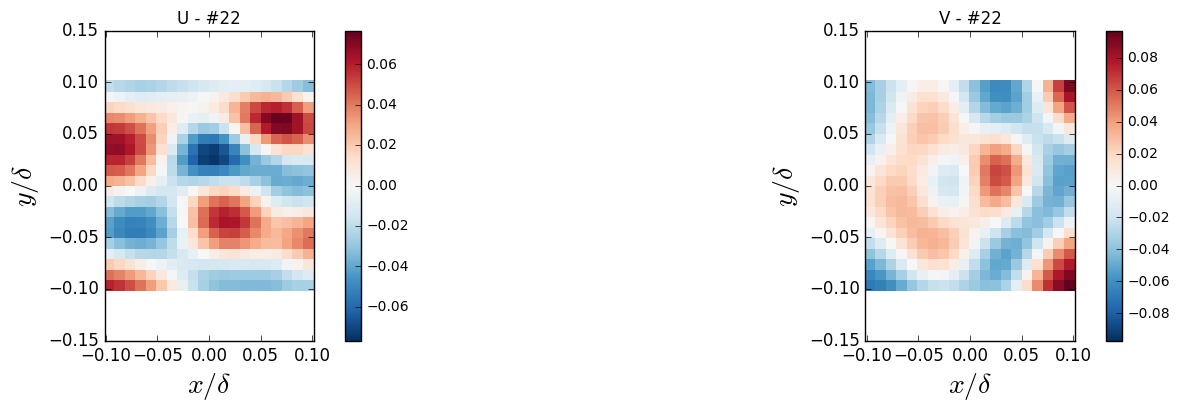

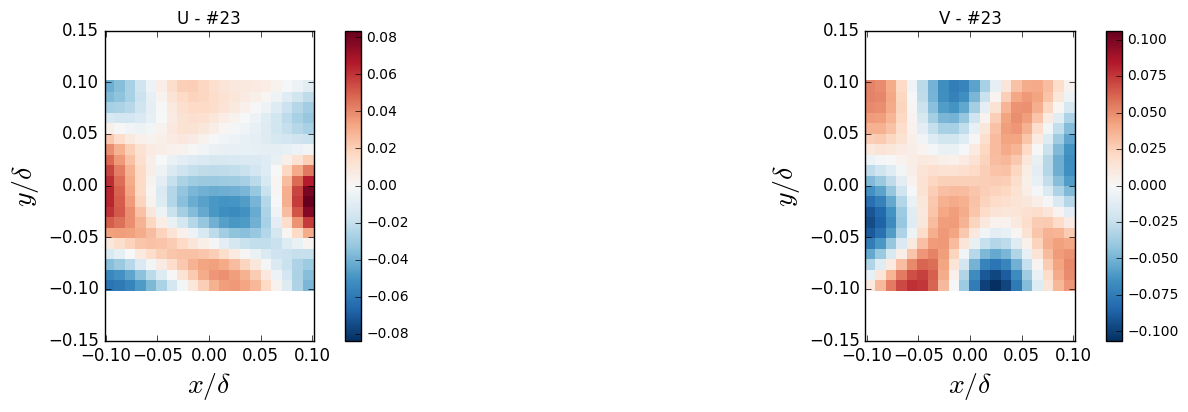

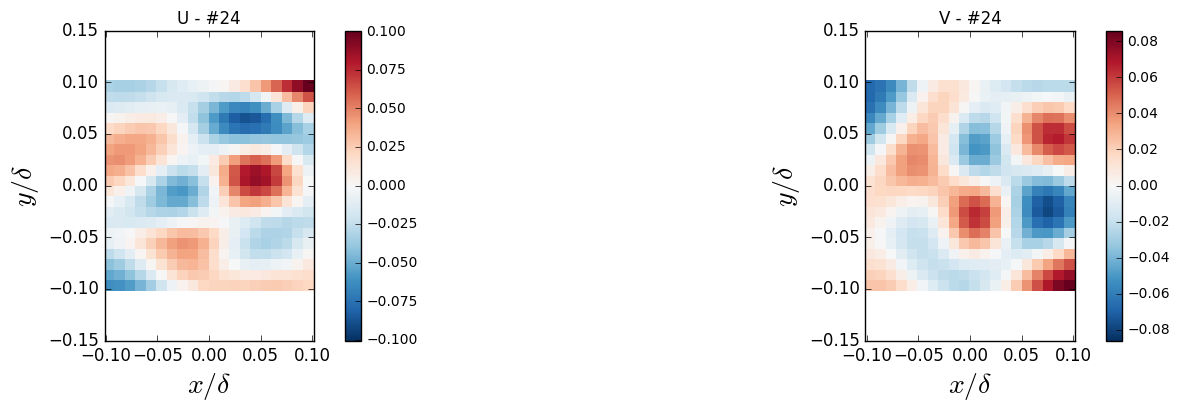

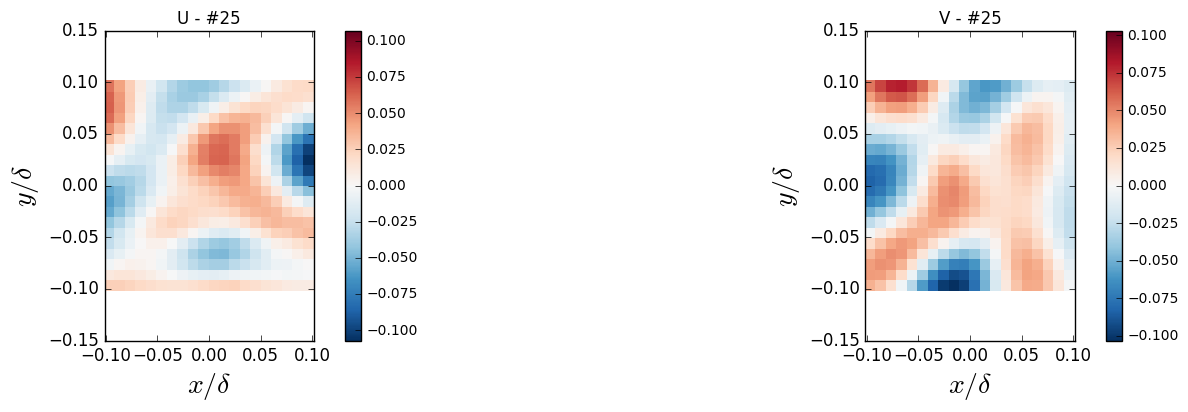

In [66]:
import PODutils
PODutils.plotPODmodes2D(X[:2*BoxSize+1,:2*BoxSize+1],Y[:2*BoxSize+1,:2*BoxSize+1],Umodes,Vmodes,list(range(25)))

### Plot the variation of the coefficients

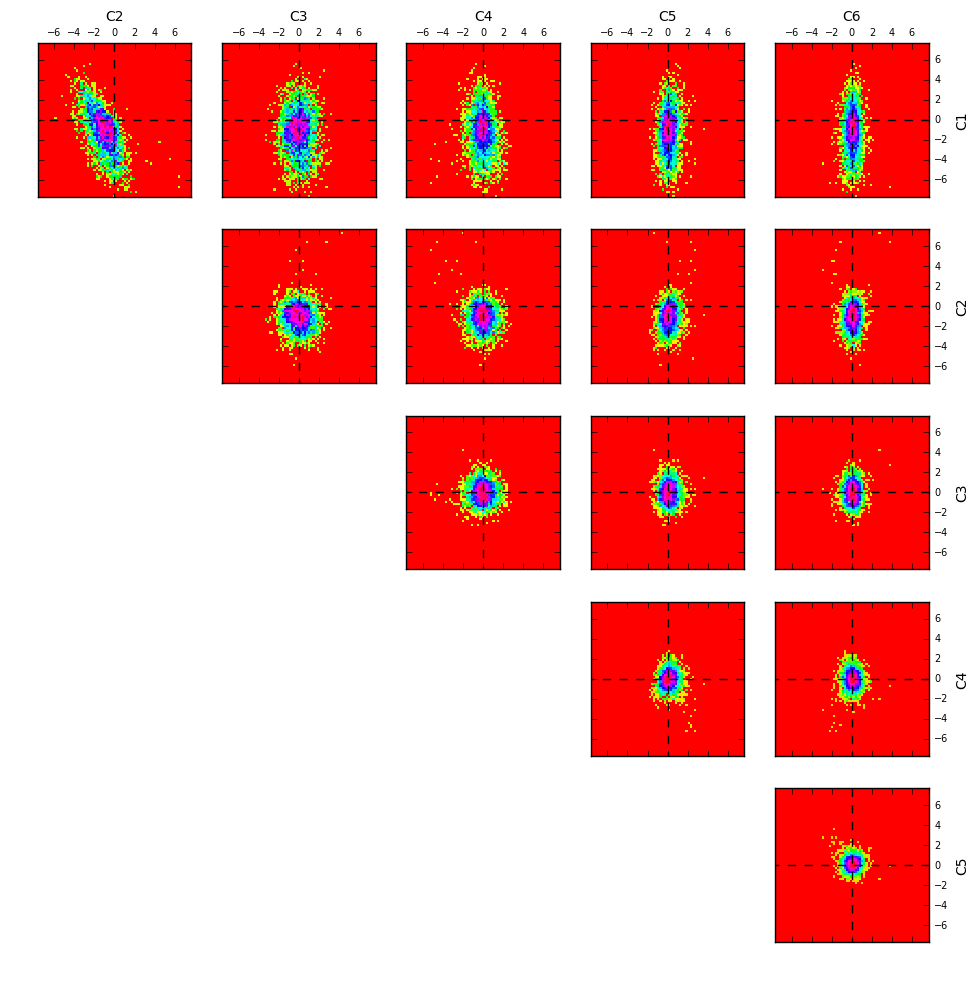

In [67]:
reload(PODutils)
PODutils.plotPODcoeff(C,list(range(6)),75,8,1)

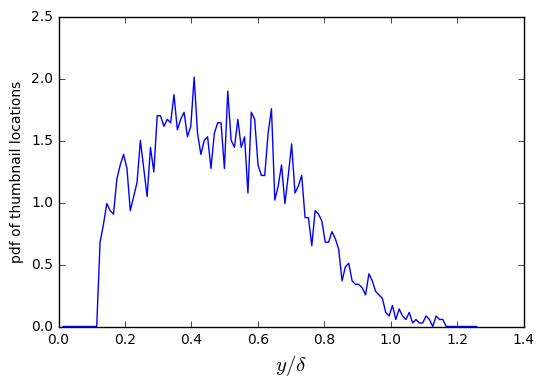

In [68]:
# Calcualte pdf of wall-normal locations
xedges = Yvec
xedges = np.concatenate([[xedges[0]-(xedges[1]-xedges[0])],xedges, [xedges[-1]+xedges[-1]-xedges[-2]]])
p, x = np.histogram(Ypos_Ret, xedges,normed=True)
x = x[:-1] + (x[1] - x[0])/2 
plt.plot(x, p)
plt.xlabel('$y/\delta$', fontsize=15)
plt.ylabel('pdf of thumbnail locations')

plt.savefig(saveFolder + '/PDFswirl-Ret-10.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

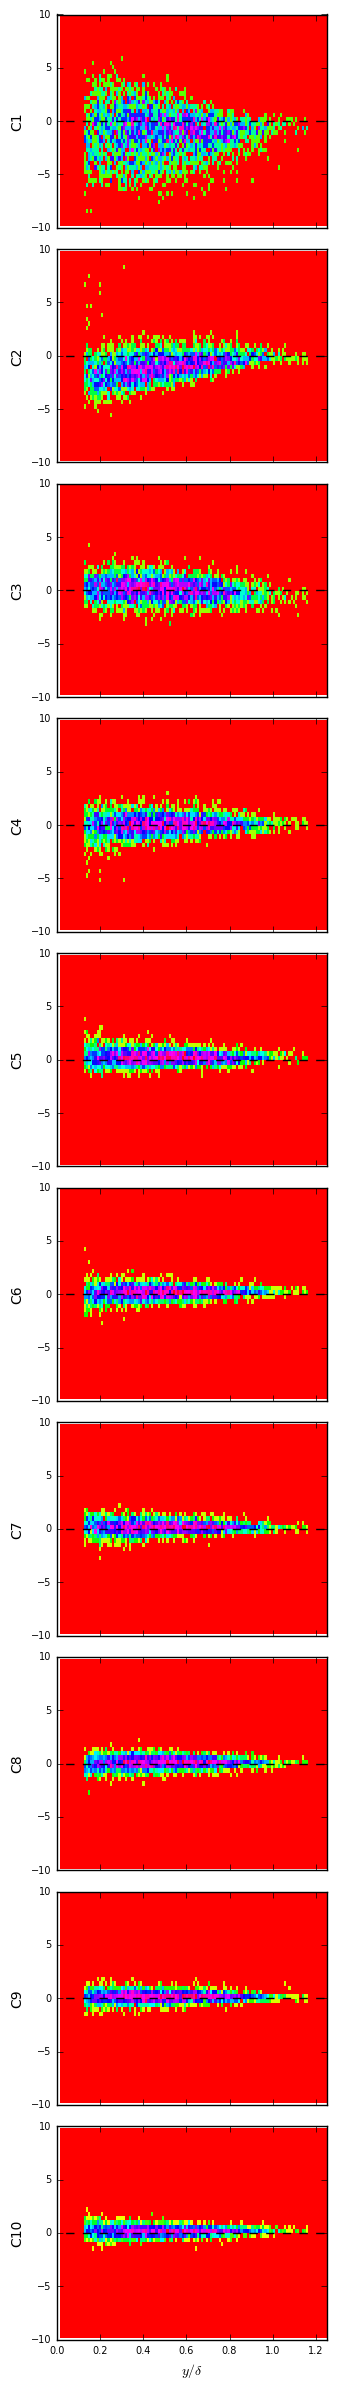

In [69]:
reload(PODutils)
C2 = C.copy()
C2 = np.concatenate([Ypos_Ret.reshape((-1, 1)).T, C2], axis=0)
PODutils.plotYposPODcoeff(Yvec,C2,list(range(10)),50,10,1)

# Do POD on random set of data

In [24]:
reload(PIVutils)
BoxSize = 10

Ut, Vt, St = PIVutils.getRandomThumbnails2D(U,Vf,Swirl,num_features_Pro,BoxSize)

NameError: name 'Uf' is not defined

In [ ]:
#Set all NaNs to zero
Ut[np.isnan(Ut)] = 0
Vt[np.isnan(Vt)] = 0

uSize = Ut.shape

In [ ]:
uAll = np.concatenate((Ut.reshape(uSize[0]*uSize[1],uSize[2]), Vt.reshape(uSize[0]*uSize[1],uSize[2])), axis = 0)
#uAll.shape      

In [ ]:
import modred as mr

num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(uAll, list(range(num_modes)))

In [ ]:
menergy = eig_vals/np.sum(eig_vals)
menergy_sum = np.zeros(len(menergy))
for i in range(len(menergy)):
    menergy_sum[i] = np.sum(menergy[:i]);

In [ ]:
reload(PODutils)
Umodes, Vmodes= PODutils.reconstructPODmodes(modes,uSize,num_modes,2)

In [ ]:
#Calculate the mode coefficients
C = modes.transpose()*uAll
C = np.asarray(C)

### Plot modal energy and contribution total

In [ ]:
ind = np.arange(num_modes)  # the x locations for the groups
width = 1       # the width of the bars

f = plt.figure()
ax = plt.gca()
ax2 = plt.twinx()
rect = ax.bar(ind,menergy[:num_modes], width, color='gray')
line = ax2.plot(ind,menergy_sum[:num_modes],'--r')

ax.set_xlabel("Mode Number",fontsize=14)
ax.set_ylabel("Scaled Mode Energy",fontsize=14)
ax2.set_ylabel("Integrated Energy",fontsize=14,color='red')

f.savefig(saveFolder + '/ModeEnergy-Pro-10.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

### Plot some modes

In [ ]:
import PODutils
PODutils.plotPODmodes2D(X[:2*BoxSize+1,:2*BoxSize+1],Y[:2*BoxSize+1,:2*BoxSize+1],Umodes,Vmodes,list(range(25)),saveFolder)

### Plot the variation of the coefficients

In [ ]:
reload(PODutils)
PODutils.plotPODcoeff(C,list(range(6)),100,8,1,saveFolder)

In [ ]:
ind = 0
ypos =[]
for i in range(len(cent_Pro)):
    for j in range(len(cent_Pro[i])):
        ypos = np.concatenate([ypos, [Y[cent_Pro[i][j][0],1]]])
        
        #[ind] = cent_Pro[i][j][0]*scale+Y[1,1]
        #ind+=1


In [ ]:
# Calcualte pdf of wall-normal locations
xedges = Y[:,0]/Cond["delta"]
xedges = np.concatenate([[xedges[0]-(xedges[1]-xedges[0])],xedges, [xedges[-1]+xedges[-1]-xedges[-2]]])
p, x = np.histogram(ypos/Cond["delta"], xedges,normed=True)
x = x[:-1] + (x[1] - x[0])/2 
plt.plot(x, p)
plt.xlabel('$y/\delta$', fontsize=15)
plt.ylabel('pdf of thumbnail locations')

plt.savefig(saveFolder + '/PDFswirl-Pro-10.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

In [ ]:
reload(PODutils)
C2 = C.copy()
C2 = np.concatenate([ypos.reshape((-1, 1)).T/Cond["delta"], C2], axis=0)
PODutils.plotYposPODcoeff(Y[:,0]/Cond["delta"],C2,list(range(10)),50,10,1,saveFolder)